In [1]:
pip install pyEX   

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import math

from itertools import chain   
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import pyarrow.parquet as pq
from sklearn import preprocessing

import pyEX as p
isSandbox = False
if isSandbox:
    token ='Tpk_02dcd2036e7641b880dd4cbb01fa9c67'
    iex_ver = 'sandbox'
else:
    token ='pk_2e94555e43da4135a6032433c6b18fa5'
    iex_ver = 'stable'
pyEX_cl = p.Client(api_token=token)
#https://www.analyticsvidhya.com/blog/2021/06/style-your-pandas-dataframe-and-make-it-stunning/

In [134]:
sufx="bbo"
#s3://maystreetdata/analysis/joined_df_stats_by_symbol_mt_oddlot_mt_roundlot_bbo.parquet/
res_file_name=f'joined_df_stats_by_symbol_mt_oddlot_mt_roundlot_{sufx}.parquet/'  
res_dir=f's3://maystreetdata/analysis/'
res_file=f'{res_dir}{res_file_name}/'
df = pq.read_table(source=res_file).to_pandas()
df['hour_est']=df['hour_est'].astype(float)
cols_to_num=['diff_exchange_timestamp_sum','bidask_timeweight_mt_oddlot_sum'
             ,f'bidask_timeweight_mt_roundlot_{sufx}_sum','percent_oddlot_is_top',f'bid_ask_tw_mt_oddlot',f'bid_ask_tw_mt_roundlot_{sufx}']
for one_col in cols_to_num:
    df[one_col]=df[one_col].astype(float)
#agg_pd = pd.read_parquet(res_file, engine='pyarrow')

In [3]:
df

,Product,Feed_mt_roundlot_bbo,f_mt_roundlot_bbo,is_trading_hours,hour_est,diff_exchange_timestamp_sum,bidask_timeweight_mt_oddlot_sum,bidask_timeweight_mt_roundlot_bbo_sum,mid_timeweight_mt_oddlot_sum,mid_timeweight_mt_roundlot_bbo_sum,percent_oddlot_is_top,bid_ask_tw_mt_oddlot,bid_ask_tw_mt_roundlot_bbo,mid_tw_mt_oddlot,mid_tw_mt_roundlot_bbo,price_bucket_mt_oddlot,price_bucket_mt_roundlot_bbo
0,A,CQS,cqs_pillar,False,16.0,9.235318e+13,1.049885e+13,1.304946e+13,11649800909482584.895000,11717357846863674.705000,0.007599,0.113682,0.141300,126.144011,126.875518,0_250,0_250
1,A,CQS,cqs_pillar,False,20.0,1.024972e+14,3.394315e+12,1.391920e+13,13076350420470130.180000,12854950594664675.180000,0.000000,0.033116,0.135801,127.577620,125.417563,0_250,0_250
2,A,CQS,cqs_pillar,False,9.0,3.296021e+16,4.515593e+14,2.113228e+15,4244672148321868479.245000,4241460451559300986.810000,0.001446,0.013700,0.064115,128.781700,128.684258,0_250,0_250
3,A,CQS,cqs_pillar,False,7.0,2.172189e+14,1.040037e+13,1.340764e+13,27581199858643112.725000,27556811554195579.750000,0.000000,0.047880,0.061724,126.974227,126.861951,0_250,0_250
4,A,CQS,cqs_pillar,False,4.0,1.989361e+16,1.542713e+15,2.324729e+15,2536517976794136980.055000,2565790180941727535.505000,0.000000,0.077548,0.116858,127.504158,128.975596,0_250,0_250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183989,ZYXI,UQDF,uqdf_binary,True,15.0,1.111101e+15,6.206536e+13,6.816832e+13,8741484144268611.425000,8737709199995435.860000,0.001280,0.055859,0.061352,7.867408,7.864011,0_250,0_250
183990,ZYXI,UQDF,uqdf_binary,True,11.0,7.770254e+14,4.794654e+13,5.506373e+13,5997251604772798.520000,5992909158850167.795000,0.001039,0.061705,0.070865,7.718219,7.712630,0_250,0_250
183991,ZYXI,UQDF,uqdf_binary,True,9.0,2.269189e+16,7.716203e+15,7.823232e+15,187317566447212186.190000,187323409400610289.400000,0.001212,0.340042,0.344759,8.254823,8.255081,0_250,0_250
183992,ZYXI,UQDF,uqdf_binary,True,10.0,7.684151e+14,4.399567e+13,5.089271e+13,6009519781893625.350000,6008864712499891.160000,0.000858,0.057255,0.066231,7.820669,7.819816,0_250,0_250


In [4]:
test_df=df[[f'bid_ask_tw_mt_oddlot',f'bid_ask_tw_mt_roundlot_{sufx}']].dropna()
stats.ttest_ind(test_df['bid_ask_tw_mt_oddlot'], test_df[f'bid_ask_tw_mt_roundlot_{sufx}'])

Ttest_indResult(statistic=-29.863143161341423, pvalue=1.0178550714778577e-195)

In [13]:
df[['is_trading_hours','price_bucket_mt_oddlot',f'bid_ask_tw_mt_oddlot',f'bid_ask_tw_mt_roundlot_{sufx}','percent_oddlot_is_top']].dropna().groupby(['is_trading_hours']).mean()

,bid_ask_tw_mt_oddlot,bid_ask_tw_mt_roundlot_bbo,percent_oddlot_is_top
is_trading_hours,,,
False,0.332209,0.386455,0.000906
True,0.136993,0.145231,0.001359


In [24]:

ol_rl_stats = df.groupby(['hour_est','is_trading_hours','price_bucket_mt_oddlot']).agg({'bid_ask_tw_mt_oddlot':['mean','count']
                                                               ,f'bid_ask_tw_mt_roundlot_{sufx}':['mean','count']
                                                               ,'percent_oddlot_is_top':['mean','count']
                                                              })
ol_rl_stats.columns=['_'.join(col) for col in ol_rl_stats.columns.values]
#print(ol_rl_stats)
disp_df=pd.pivot_table(ol_rl_stats.query(f"is_trading_hours == is_trading_hours"), values=['bid_ask_tw_mt_oddlot_mean',f'bid_ask_tw_mt_roundlot_{sufx}_mean'],
                       index=['hour_est','is_trading_hours','price_bucket_mt_oddlot'],
                    columns=[], aggfunc=np.mean)/100


fname=f's3://maystreetdata/analysis/blog_graphs/oddlot_roundlot(bbo)_spread_by_HOUR_PRICEBUCKET_V2.csv'
disp_df.to_csv(fname)
disp_df.query("hour_est>0").style.format({
    'bid_ask_tw_mt_oddlot_mean': '{:,.4%}'.format,
    f'bid_ask_tw_mt_roundlot_{sufx}_mean': '{:,.4%}'.format,
}).bar()

In [6]:
disp_df.bid_ask_tw_mt_oddlot_mean

hour_est  is_trading_hours  price_bucket_mt_oddlot
4.0       False             0_250                     0.002880
                            10000+                    0.002437
                            1000_10000                0.005937
                            250_1000                  0.001609
5.0       False             0_250                     0.002072
                                                        ...   
19.0      False             250_1000                  0.000254
20.0      False             0_250                     0.001149
                            10000+                    0.001764
                            1000_10000                0.000491
                            250_1000                  0.000413
Name: bid_ask_tw_mt_oddlot_mean, Length: 76, dtype: float64

In [7]:
#res_file='s3://maystreetdata/analysis/ARKW_trades.parquet/'
#arkw_pd = pq.read_table(source=res_file).to_pandas().set_index('ExchangeTimestamp').sort_index()

In [12]:
if True:
    res_file='s3://maystreetdata/analysis/trade_stats_by_mp.parquet/'
    trade_stats_pd = pq.read_table(source=res_file).to_pandas().set_index('Product').sort_index().reset_index()
    trade_stats_pd['hour_est']=trade_stats_pd['hour_est'].astype(int)
    trade_stats_pd=trade_stats_pd.set_index('hour_est','is_trading_hours')
    cols_to_num=['trade_volume_daily_mean','trade_count_daily_mean','day_count']
    for one_col in cols_to_num:
        trade_stats_pd[one_col]=trade_stats_pd[one_col].astype(float)
    

In [13]:
trade_stats_all = trade_stats_pd.query("(Feed=='CTS' or Feed=='UTDF') and Printable=='Printable'")
trade_stats_dark_pool_only = trade_stats_pd.query("(Feed=='CTS' or Feed=='UTDF') and Printable=='Printable' and MarketParticipant=='FINRA' ")
trade_stats_dark_pool_EXC = trade_stats_pd.query("(Feed=='CTS' or Feed=='UTDF') and Printable=='Printable' and MarketParticipant!='FINRA' ")

In [14]:

def make_trade_agg(df_l):
    df_l_agg=df_l.groupby(['hour_est','is_trading_hours']).agg({'trade_volume_daily_mean':['sum']})
    df_l_agg.columns=['_'.join(col) for col in df_l_agg.columns.values]
    return(df_l_agg)

trade_stats_all_agg_all=make_trade_agg(trade_stats_all)
trade_stats_all_agg_dark_pool_only=make_trade_agg(trade_stats_dark_pool_only)
trade_stats_all_agg_dark_pool_EXC=make_trade_agg(trade_stats_dark_pool_EXC)

if True:
    spread_volume_pd = trade_stats_all_agg_all.join(disp_df).dropna().sort_index().reset_index()
    spread_volume_pd['hour_est'] = spread_volume_pd['hour_est'].astype(int)
    spread_volume_pd=spread_volume_pd.query('hour_est>0')
    spread_volume_pd=spread_volume_pd.set_index(['hour_est','is_trading_hours'])
    spread_volume_pd['ol_rl_pct_diff']=spread_volume_pd['bid_ask_tw_mt_oddlot_mean']-spread_volume_pd[f'bid_ask_tw_mt_roundlot_{sufx}_mean']
    spread_volume_pd['ol_rl_pct_diff_X_volume']=spread_volume_pd['ol_rl_pct_diff']*spread_volume_pd['trade_volume_daily_mean_sum']

    spread_volume_pd['ol_rl_pct_diff_X_volume'].sum()/spread_volume_pd['trade_volume_daily_mean_sum'].sum()*100
trade_stats_all_agg_all.style.format({
        'trade_volume_daily_mean_sum': '{:,.0f}'.format,
    })

,,trade_volume_daily_mean_sum
hour_est,is_trading_hours,
0,False,"67,613,375"
1,False,"29,020,222"
2,False,"63,514,569"
3,False,"58,321,351"
4,False,"553,439,874"
5,False,"314,345,802"
6,False,"420,215,790"
7,False,"2,075,748,610"
8,False,"6,308,616,704"


In [15]:
spread_volume_pd.query('hour_est>8').style.format({
    'trade_volume_sum': '{:,.0f}'.format,
    'bid_ask_tw_mt_oddlot_mean': '{:,.2%}'.format,
    f'bid_ask_tw_mt_roundlot_{sufx}_mean': '{:,.2%}'.format,
    'ol_rl_pct_diff': '{:,.2%}'.format,
}).bar()

ValueError: style is not supported for non-unique indices.

In [16]:
print(trade_stats_all.trade_count_daily_mean.sum()
,'\n',trade_stats_dark_pool_only.trade_count_daily_mean.sum()
,'\n',trade_stats_dark_pool_EXC.trade_count_daily_mean.sum()
     )
spread_volume_pd

70789339.52421784 
 15413828.041470623 
 55375511.48274725


price_bucket_mt_oddlot  trade_volume_daily_mean_sum  \
hour_est is_trading_hours                                                       
4        False                             0_250                 5.534399e+08   
         False                            10000+                 5.534399e+08   
         False                        1000_10000                 5.534399e+08   
         False                          250_1000                 5.534399e+08   
5        False                             0_250                 3.143458e+08   
...                                          ...                          ...   
19       False                          250_1000                 6.787143e+08   
20       False                             0_250                 8.008456e+08   
         False                            10000+                 8.008456e+08   
         False                        1000_10000                 8.008456e+08   
         False                          250_1000                 8.008456e+08   

                           bid_ask_tw_mt_oddlot_mean  \
hour_est is_trading_hours                              
4        False                              0.002880   
         False                              0.002437   
         False                              0.005937   
         False                              0.001609   
5        False                              0.002072   
...                                              ...   
19       False                              0.000254   
20       False                              0.001149   
         False                              0.001764   
         False                              0.000491   
         False                              0.000413   

                           bid_ask_tw_mt_roundlot_bbo_mean  ol_rl_pct_diff  \
hour_est is_trading_hours                                                    
4        False                                    0.003622       -0.000743   
         False                                    0.002437        0.000000   
         False                                    0.007234       -0.001298   
         False                                    0.003081       -0.001471   
5        False                                    0.002876       -0.000804   
...                                                    ...             ...   
19       False                                    0.001485       -0.001231   
20       False                                    0.002666       -0.001517   
         False                                    0.006106       -0.004341   
         False                                    0.003937       -0.003445   
         False                                    0.002169       -0.001756   

                           ol_rl_pct_diff_X_volume  
hour_est is_trading_hours                           
4        False                       -4.111841e+05  
         False                        0.000000e+00  
         False                       -7.182487e+05  
         False                       -8.141876e+05  
5        False                       -2.527126e+05  
...                                            ...  
19       False                       -8.357577e+05  
20       False                       -1.214905e+06  
         False                       -3.476807e+06  
         False                       -2.759204e+06  
         False                       -1.406385e+06  

[76 rows x 6 columns]

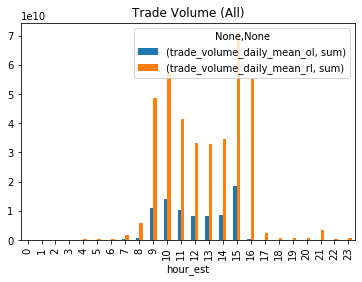

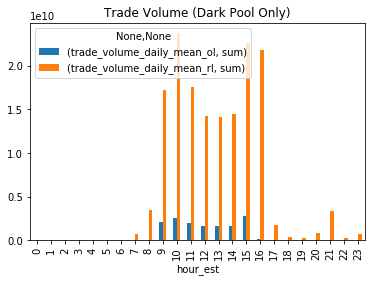

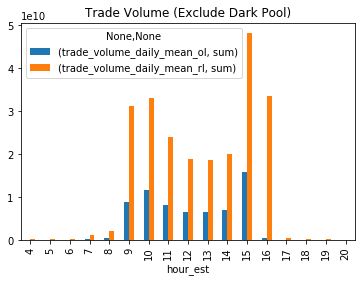

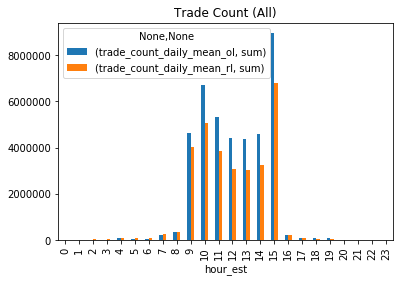

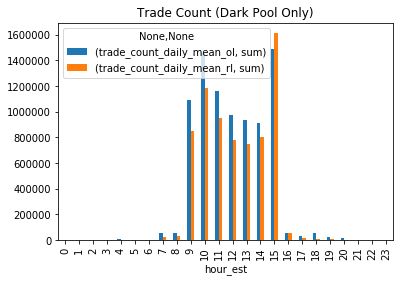

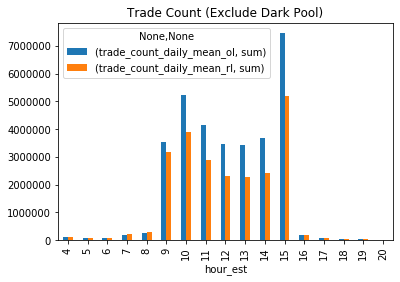

In [17]:
def get_OL_RL_stats(df_l,col_name,col_func,fname=None):
    ts_comb=df_l.query('is_odd_lot==True').groupby(['hour_est']).agg({col_name:[col_func]}).join(
    df_l.query('is_odd_lot==False').groupby(['hour_est']).agg({col_name:[col_func]}),lsuffix='_ol', rsuffix='_rl')
    if fname==None:
        pass
    else:
        ts_comb.to_csv(fname)
    return(ts_comb)
get_OL_RL_stats(trade_stats_all,'trade_volume_daily_mean','sum',fname=f's3://maystreetdata/analysis/blog_graphs/trade_volume_all.csv')\
.plot.bar(title='Trade Volume (All)')
get_OL_RL_stats(trade_stats_dark_pool_only,'trade_volume_daily_mean','sum',fname=f's3://maystreetdata/analysis/blog_graphs/trade_volume_dark_pool_only.csv')\
.plot.bar(title='Trade Volume (Dark Pool Only)')
get_OL_RL_stats(trade_stats_dark_pool_EXC,'trade_volume_daily_mean','sum',fname=f's3://maystreetdata/analysis/blog_graphs/trade_volume_dark_pool_exclude.csv')\
.plot.bar(title='Trade Volume (Exclude Dark Pool)')


get_OL_RL_stats(trade_stats_all,'trade_count_daily_mean','sum',fname=f's3://maystreetdata/analysis/blog_graphs/trade_count_all.csv')\
.plot.bar(title='Trade Count (All)')
get_OL_RL_stats(trade_stats_dark_pool_only,'trade_count_daily_mean','sum',fname=f's3://maystreetdata/analysis/blog_graphs/trade_count_dark_pool_only.csv')\
.plot.bar(title='Trade Count (Dark Pool Only)')
get_OL_RL_stats(trade_stats_dark_pool_EXC,'trade_count_daily_mean','sum',fname=f's3://maystreetdata/analysis/blog_graphs/trade_count_dark_pool_exclude.csv')\
.plot.bar(title='Trade Count (Exclude Dark Pool)')

total trade couint - 58024178

odd l;ot trade count - 33045020

Total FINRA trade counts - 16002382

FINRA odd lot trade counts-  8426264


trade_stats_all_agg_all=make_trade_agg(trade_stats_all)

trade_stats_all_agg_dark_pool_only=make_trade_agg(trade_stats_dark_pool_only)

trade_stats_all_agg_dark_pool_EXC=make_trade_agg(trade_stats_dark_pool_EXC)

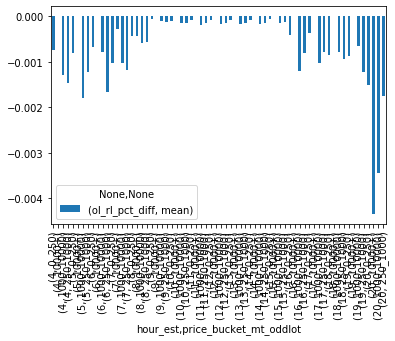

In [50]:
(spread_volume_pd).query('hour_est>0').groupby(['hour_est','price_bucket_mt_oddlot']).agg({'ol_rl_pct_diff':['mean']}).plot.bar()
fname=f's3://maystreetdata/analysis/blog_graphs/oddlot_roundlot(bbo)_spread_by_HOUR_PRICEBUCKET.csv'
(spread_volume_pd).query('hour_est>0').groupby(['hour_est','price_bucket_mt_oddlot']).agg({'ol_rl_pct_diff':['mean']}).to_csv(fname)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d8b288908>],
      dtype=object)

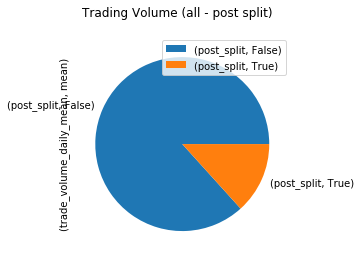

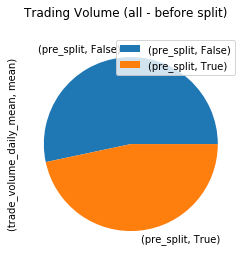

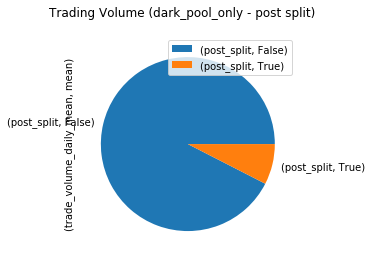

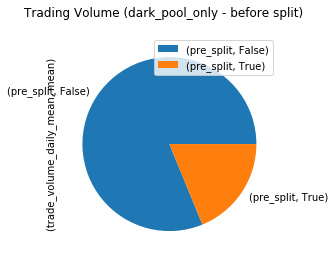

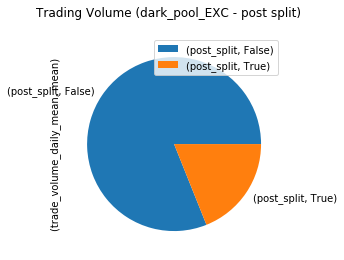

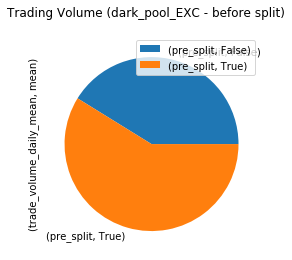

In [19]:
def pre_post_split(df_l,fname=None):
    df_l_agg=df_l.query("Product=='AMZN'").groupby(['before_after_split','is_odd_lot']).agg({'trade_volume_daily_mean':['mean']})
    df_l_agg_before_split=df_l_agg.query('before_after_split=="pre_split"')
    df_l_agg_after_split=df_l_agg.query('before_after_split=="post_split"')
    if fname==None:
        pass
    else:
        df_l_agg_before_split.to_csv(f'{fname}_before_split.csv')
        df_l_agg_after_split.to_csv(f'{fname}_after_split.csv')
    return((df_l_agg_after_split,df_l_agg_before_split))

trade_stats_all_B_A = pre_post_split(trade_stats_all,fname=f's3://maystreetdata/analysis/blog_graphs/all')
trade_stats_all_B_A[0].plot.pie(subplots=True,title='Trading Volume (all - post split)')#y='trade_volume')
trade_stats_all_B_A[1].plot.pie(subplots=True,title='Trading Volume (all - before split)')#y='trade_volume')

trade_stats_all_B_A = pre_post_split(trade_stats_dark_pool_only,fname=f's3://maystreetdata/analysis/blog_graphs/dark_pool_only')
trade_stats_all_B_A[0].plot.pie(subplots=True,title='Trading Volume (dark_pool_only - post split)')#y='trade_volume')
trade_stats_all_B_A[1].plot.pie(subplots=True,title='Trading Volume (dark_pool_only - before split)')#y='trade_volume')

trade_stats_all_B_A = pre_post_split(trade_stats_dark_pool_EXC,fname=f's3://maystreetdata/analysis/blog_graphs/dark_pool_EXC')
trade_stats_all_B_A[0].plot.pie(subplots=True,title='Trading Volume (dark_pool_EXC - post split)')#y='trade_volume')
trade_stats_all_B_A[1].plot.pie(subplots=True,title='Trading Volume (dark_pool_EXC - before split)')#y='trade_volume')

In [64]:
msg_count_dict={}

In [71]:
sufx="roundlot_bbo"
#s3://maystreetdata/analysis/joined_df_stats_by_symbol_mt_oddlot_mt_roundlot_bbo.parquet/
res_file_name=f'mt_{sufx}_message_count.parquet'  
res_dir=f's3://maystreetdata/analysis/'
res_file=f'{res_dir}{res_file_name}/'
print(res_file)

msg_count_dict[sufx]= pq.read_table(source=res_file).to_pandas()
#df['hour_est']=df['hour_est'].astype(float)
#cols_to_num=['diff_exchange_timestamp_sum','bidask_timeweight_mt_oddlot_sum'
#             ,f'bidask_timeweight_mt_roundlot_{sufx}_sum','percent_oddlot_is_top',f'bid_ask_tw_mt_oddlot',f'bid_ask_tw_mt_roundlot_{sufx}']
#for one_col in cols_to_num:
#    df[one_col]=df[one_col].astype(float)
#agg_pd = pd.read_parquet(res_file, engine='pyarrow')

s3://maystreetdata/analysis/mt_roundlot_bbo_message_count.parquet/


In [72]:
msg_count_dict.get('roundlot_bbo')#.to_csv(f's3://maystreetdata/analysis/blog_graphs/roundlot_bbo_msg_count.csv')

,MarketParticipant,message_count
0,BATS,3841608149
1,BATSY,1434075392
2,CSX,598255696
3,DirectEdgeA,2166583402
4,DirectEdgeX,3059904090
5,EPRL,931800249
6,FINRA,0
7,INVESTORS_EXCHANGE,1914748061
8,LTSE,166853
9,MEMX,4053960717


In [73]:
msg_count_dict.get('oddlot')#.to_csv(f's3://maystreetdata/analysis/blog_graphs/oddlot_msg_count.csv')

,MarketParticipant,oddlot_message_count
0,DirectEdgeX,855038497
1,BATS,1268341161
2,NYSEMKT,103842566
3,BATSY,138960542
4,DirectEdgeA,222622808
5,NSX,68042412
6,CSX,12654732
7,NASDAQOMX,3049132913
8,NASDAQOMXPSX,283261332
9,NYSEArca,1372067301


In [76]:
ol_rl_pd=msg_count_dict.get('oddlot').set_index('MarketParticipant').join(msg_count_dict.get('roundlot_bbo').set_index('MarketParticipant'),how='outer')/1
ol_rl_pd['msg_icrease_pct']=ol_rl_pd['oddlot_message_count']/ol_rl_pd['message_count']
fname=f's3://maystreetdata/analysis/blog_graphs/msg_count.csv'
ol_rl_pd.to_csv(fname)
ol_rl_pd

,oddlot_message_count,message_count,msg_icrease_pct
MarketParticipant,,,
BATS,1.268341e+09,3.841608e+09,0.330159
BATSY,1.389605e+08,1.434075e+09,0.096899
CSX,1.265473e+07,5.982557e+08,0.021153
DirectEdgeA,2.226228e+08,2.166583e+09,0.102753
DirectEdgeX,8.550385e+08,3.059904e+09,0.279433
EPRL,2.993841e+08,9.318002e+08,0.321296
FINRA,NaN,0.000000e+00,NaN
INVESTORS_EXCHANGE,5.926439e+08,1.914748e+09,0.309515
LTSE,NaN,1.668530e+05,NaN


In [ ]:

stats_pd=pd.concat(res_pd_array)
for one_col in ['feed_oddlot','f_oddlot','is_trading_hours']:
    label_encoder = LabelEncoder()
    label_encoder.fit(stats_pd[one_col])
    stats_pd[f'{one_col}_encoded']=label_encoder.transform(stats_pd[one_col])
    
#print(stats_pd.groupby(['is_trading_hours']).sum())
stats_disp=stats_pd.sort_values(['is_trading_hours','feed_oddlot','f_oddlot','update_count_pctrank']).drop(columns=['feed_oddlot_encoded','f_oddlot_encoded','is_trading_hours_encoded']).reset_index().drop(columns=['index'])
def above_zero(val):
  try:  
    color = 'green' if val > 0 else 'red'
  except:
    color = 'grey'
  return 'color: %s' % color


In [ ]:
one_df

In [ ]:
stats_disp.query('update_count_pctrank>=0.6').dropna().style.applymap(above_zero).set_precision(2)

In [ ]:
stats_disp.query('update_count_pctrank==0').dropna().style.applymap(above_zero).set_precision(2)

In [ ]:
stats_disp.query('update_count_pctrank>=0.3 and update_count_pctrank<=0.5').dropna().style.applymap(above_zero).set_precision(2)

In [ ]:
stats_pd.groupby(['is_trading_hours']).sum()

In [ ]:
spread_stats_pd=pd.pivot_table(stats_pd.round(2),values=['statistic_odd_vs_roundBBO','statistic_odd_vs_roundNBBO'],columns=['is_trading_hours','hour_est']
               ,index=['feed_oddlot','f_oddlot','update_count_pctrank'])
spread_stats_pd.to_csv(f'{res_dir}spread_stats_pivot_{comp_type}.csv')
spread_stats_pd.style.applymap(above_zero).set_precision(2)

In [ ]:
cols =['is_trading_hours','is_trading_hours_encoded','statistic_odd_vs_roundBBO','statistic_odd_vs_roundNBBO']
pd.plotting.parallel_coordinates(
    stats_pd[cols]*1, 'is_trading_hours', color=('#556270', '#4ECDC4', '#C7F464')
)


In [108]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

from itertools import chain   
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [3]:
spy_full_pd = pd.read_csv('s3://maystreetdata/analysis/spy_full.csv')
spy_full_pd=spy_full_pd.set_index('exchange_ts').sort_index()
spy_full_pd

,Unnamed: 0,Product_nbbo,SequenceNumber,Feed,SequenceNumber_nbbo,Side,BidQuantity_1,BidPrice_1,Price,AskPrice_1,AskQuantity_1,Quantity,SaleCondition,SaleCondition2,SaleCondition3,SaleCondition4
exchange_ts,,,,,,,,,,,,,,,,
1636035828600286047,0,NaN,1013832,NaN,NaN,NaN,NaN,NaN,466.6850,NaN,NaN,346.0,RegularTrade,NoSaleCondition,SoldOutOfSequence,NoSaleCondition
1636035829637667900,1,NaN,1013836,NaN,NaN,NaN,NaN,NaN,466.6650,NaN,NaN,346.0,RegularTrade,NoSaleCondition,SoldOutOfSequence,NoSaleCondition
1636035829680023339,2,NaN,1013837,NaN,NaN,NaN,NaN,NaN,466.6700,NaN,NaN,908.0,RegularTrade,NoSaleCondition,SoldOutOfSequence,NoSaleCondition
1636035829945058798,3,NaN,1013838,NaN,NaN,NaN,NaN,NaN,466.6650,NaN,NaN,200.0,RegularTrade,NoSaleCondition,SoldOutOfSequence,NoSaleCondition
1636035829993169791,4,NaN,1013839,NaN,NaN,NaN,NaN,NaN,466.6650,NaN,NaN,200.0,RegularTrade,NoSaleCondition,SoldOutOfSequence,NoSaleCondition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661558326310000000,4503635,NaN,1708379,NaN,NaN,NaN,NaN,NaN,403.9299,NaN,NaN,100.0,RegularTrade,NoSaleCondition,ExtendedHoursTradeOutOfSequence,NoSaleCondition
1661558339429000000,4503636,NaN,1708436,NaN,NaN,NaN,NaN,NaN,403.9299,NaN,NaN,100.0,RegularTrade,NoSaleCondition,ExtendedHoursTradeOutOfSequence,NoSaleCondition
1661558358191000000,4503637,NaN,1708583,NaN,NaN,NaN,NaN,NaN,403.9200,NaN,NaN,963.0,RegularTrade,NoSaleCondition,ExtendedHoursTradeOutOfSequence,NoSaleCondition


In [4]:
spy_full_pd['Bid']=spy_full_pd['BidPrice_1'].fillna(method='ffill')
spy_full_pd['Ask']=spy_full_pd['AskPrice_1'].fillna(method='ffill')
spy_full_pd=spy_full_pd#.fillna(method='ffill')
spy_full_pd['is_bid_trade']=(spy_full_pd['Price'] <= spy_full_pd['Bid'])*-1
spy_full_pd['is_ask_trade']=(spy_full_pd['Price'] >= spy_full_pd['Ask'])*1
spy_full_pd['is_invert']=((spy_full_pd['is_bid_trade']+spy_full_pd['is_ask_trade'])!=0)*1

spy_full_pd.query(f"((is_bid_trade==-1) or (is_ask_trade==1)) and is_invert==1").groupby(['is_bid_trade','is_ask_trade','is_invert']).count()

,,,Unnamed: 0,Product_nbbo,SequenceNumber,Feed,SequenceNumber_nbbo,Side,BidQuantity_1,BidPrice_1,Price,AskPrice_1,AskQuantity_1,Quantity,SaleCondition,SaleCondition2,SaleCondition3,SaleCondition4,Bid,Ask
is_bid_trade,is_ask_trade,is_invert,,,,,,,,,,,,,,,,,,
-1,0,1,1455143,933961,1455143,933961,933961,687779,933961,933961,1455143,933932,933932,1455143,1455143,1455143,1455143,1455143,1455143,1455143
0,1,1,1636875,1097607,1636875,1097607,1097607,353780,1097607,1097607,1636875,1097587,1097587,1636875,1636875,1636875,1636875,1636875,1636875,1636875


In [5]:
spy_full_pd['side_w_quantity']=spy_full_pd['Quantity']*spy_full_pd['is_bid_trade']+spy_full_pd['Quantity']*spy_full_pd['is_ask_trade']
spy_full_pd['vw_price']=spy_full_pd['Quantity']*spy_full_pd['Price']*(spy_full_pd['is_bid_trade']+spy_full_pd['is_ask_trade'])
spy_full_pd['vwap']=spy_full_pd['vw_price'].rolling(10000).sum()/spy_full_pd['Quantity'].rolling(10000).sum()

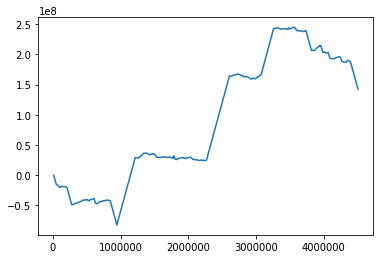

In [6]:
spy_full_pd['vwap'].cumsum().reset_index()['vwap'].plot()

In [10]:
spy_full_pd.groupby(['SaleCondition','SaleCondition2','SaleCondition3','SaleCondition4']).agg({'side_w_quantity':['count','sum']})

side_w_quantity  \
                                                                                                                count   
SaleCondition SaleCondition2                SaleCondition3                  SaleCondition4                              
CashTrade     NoSaleCondition               NoSaleCondition                 NoSaleCondition                         5   
                                                                            OddLotTrade                            26   
NextDayTrade  NoSaleCondition               NoSaleCondition                 NoSaleCondition                        15   
                                                                            OddLotTrade                           350   
RegularTrade  CorrectConsolidatedClosePrice NoSaleCondition                 NoSaleCondition                        15   
              DerivativelyPriced            NoSaleCondition                 AveragePriceTrade                    1387   
                                                                            NoSaleCondition                        35   
                                                                            OddLotTrade                          4638   
                                            SoldOutOfSequence               AveragePriceTrade                      23   
                                                                            OddLotTrade                            59   
              IntermarketSweepOrder         NoSaleCondition                 NoSaleCondition                    817553   
                                                                            OddLotTrade                        860731   
                                            SoldOutOfSequence               NoSaleCondition                         7   
                                                                            OddLotTrade                             1   
              MarketCenterClosingTrade      NoSaleCondition                 NoSaleCondition                    233341   
                                                                            OddLotTrade                        104226   
              MarketCenterOpeningTrade      NoSaleCondition                 CrossTrade                              4   
                                                                            NoSaleCondition                     80603   
                                                                            OddLotTrade                        637105   
              NoSaleCondition               ExtendedHoursTradeOutOfSequence AveragePriceTrade                       9   
                                                                            NoSaleCondition                       280   
                                                                            OddLotTrade                           579   
                                            NoSaleCondition                 AveragePriceTrade                      66   
                                                                            MarketCenterOfficialClose              25   
                                                                            MarketCenterOfficialOpen               10   
                                                                            NoSaleCondition                    833242   
                                                                            OddLotTrade                        906902   
                                            SoldOutOfSequence               NoSaleCondition                      6908   
                                                                            OddLotTrade                         13168   
              QualifiedContigentTrade       NoSaleCondition                 ContigentTrade                       1695   
                                                                            NoSaleCondition                  

In [35]:
res_file='s3://maystreetdata/analysis/Watsco.parquet/'
df = pq.read_table(source=res_file).to_pandas()
pairs_pd=df.set_index(['exchange_timestamp_mt_roundlot_bbo']).sort_index().fillna(method='ffill')
cols=['WSO_price_mean','WSO_B_price_mean']
for one_col in cols:
    pairs_pd[one_col]=pairs_pd[one_col].astype(float)

In [36]:
plot_pd=pairs_pd.query('WSO_B_price_mean>500')

In [ ]:
(plot_pd['WSO_price_mean'].pct_change().cumsum()-plot_pd['WSO_B_price_mean'].pct_change().cumsum()).reset_index().plot()

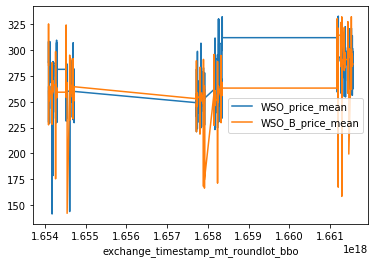

In [43]:
pairs_pd.query('WSO_B_price_mean<500')[['WSO_price_mean','WSO_B_price_mean']].plot()

In [8]:

res_file='s3://maystreetdata/analysis/spy_OF_price.parquet/'
df = pq.read_table(source=res_file).to_pandas().set_index(['date_est','timestamp_ts_est']).sort_index().fillna(method='ffill')
for one_col in ['trade_volume_signed_directional_sum','traded_price_mean']:
    df[one_col]=df[one_col].astype(float)

In [94]:
df_study=df.query("(hour_est>=9)").query("hour_est<16")
df_study

hour_est  trade_volume_signed_directional_sum  \
date_est   timestamp_ts_est                                                     
2022-06-01 2022-06-01 09:00:00         9                         6.741186e+06   
           2022-06-01 09:00:01         9                         3.233699e+06   
           2022-06-01 09:00:02         9                         4.683345e+06   
           2022-06-01 09:00:03         9                        -3.644518e+06   
           2022-06-01 09:00:04         9                        -5.638001e+06   
...                                  ...                                  ...   
2022-08-26 2022-08-26 15:59:55        15                         1.504709e+07   
           2022-08-26 15:59:56        15                         3.107311e+07   
           2022-08-26 15:59:57        15                        -4.973520e+06   
           2022-08-26 15:59:58        15                        -2.209614e+07   
           2022-08-26 15:59:59        15                         1.654370e+08   

                                traded_price_mean Product  
date_est   timestamp_ts_est                                
2022-06-01 2022-06-01 09:00:00         414.513750     SPY  
           2022-06-01 09:00:01         414.513750     SPY  
           2022-06-01 09:00:02         414.513750     SPY  
           2022-06-01 09:00:03         414.513750     SPY  
           2022-06-01 09:00:04         414.513750     SPY  
...                                           ...     ...  
2022-08-26 2022-08-26 15:59:55         405.317847     SPY  
           2022-08-26 15:59:56         405.308854     SPY  
           2022-08-26 15:59:57         405.355666     SPY  
           2022-08-26 15:59:58         405.373658     SPY  
           2022-08-26 15:59:59         405.356870     SPY  

[428237 rows x 4 columns]

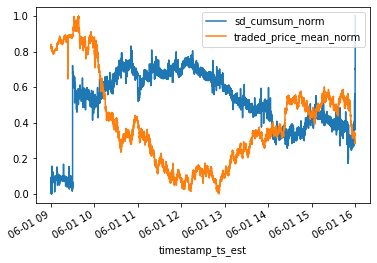

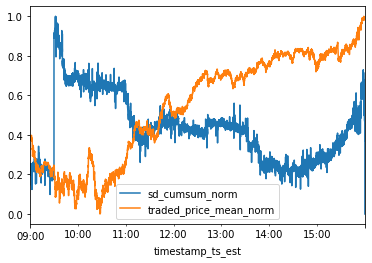

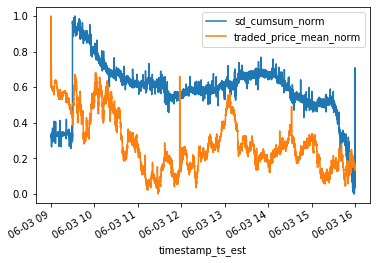

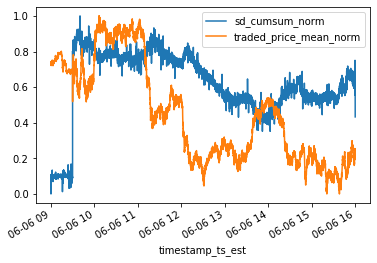

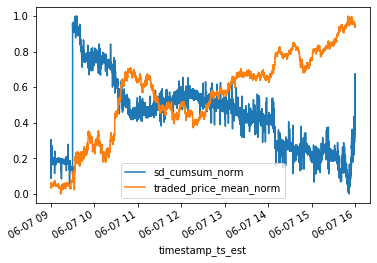

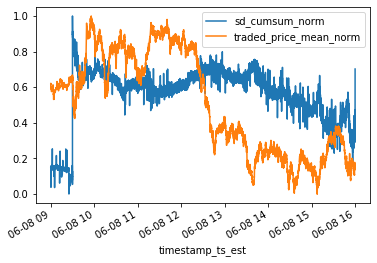

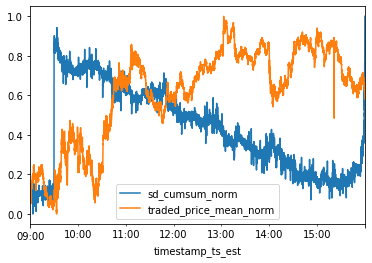

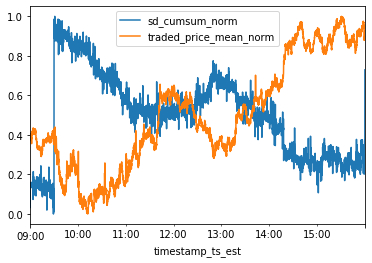

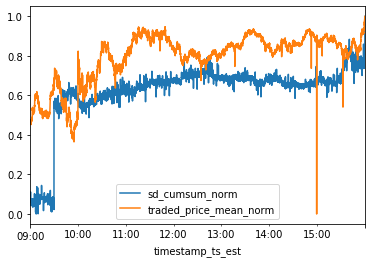

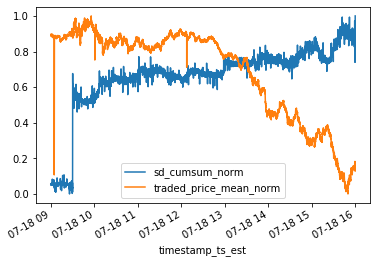

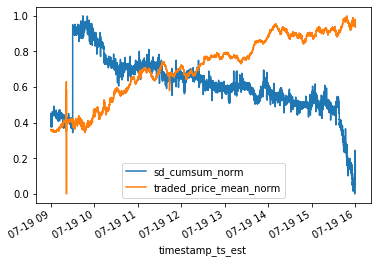

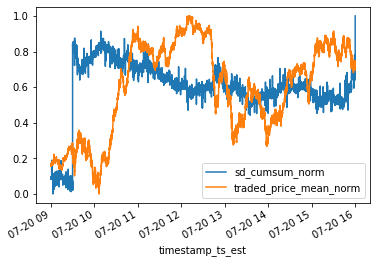

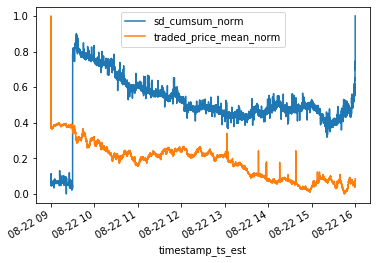

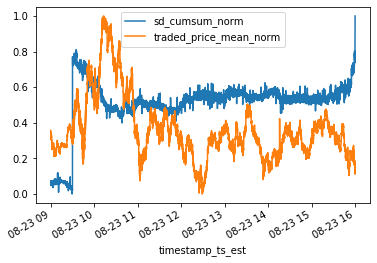

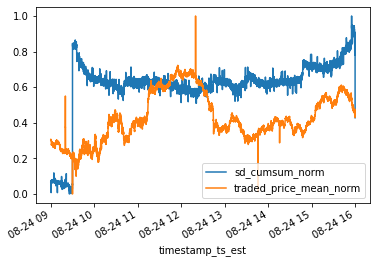

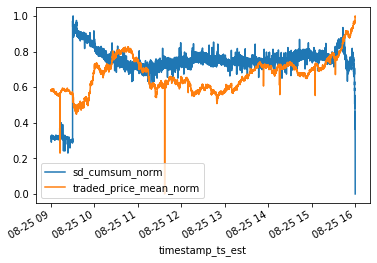

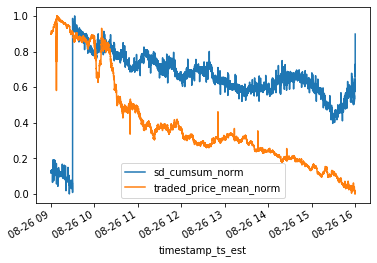

In [120]:
def norm_col(df_l,col_l):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(df_l[[col_l]].values)
    return(x_scaled)
def get_corr(df_l):
    corr_pd = pd.DataFrame(df_l.groupby(['hour_est']).apply(lambda x: np.corrcoef(x['sd_cumsum'],x['traded_price_mean'])[0][1]),columns=['corr'])
    corr_pd['date_est']=one_day
    return(corr_pd)
corr_arr=[]
for one_day in df_study.reset_index()['date_est'].drop_duplicates():
    df_study_one_day=df_study.query(f'date_est=="{one_day}"').copy(deep=True)
    df_study_one_day['sd_cumsum']=df_study_one_day['trade_volume_signed_directional_sum'].cumsum().copy(deep=True)#.rolling(5000, min_periods=1).sum().copy(deep=True)
    df_study_one_day['sd_cumsum_norm']=norm_col(df_study_one_day,'sd_cumsum')
    df_study_one_day['traded_price_mean_norm']=norm_col(df_study_one_day,'traded_price_mean')
    corr_arr=corr_arr+[get_corr(df_study_one_day)]
    df_study_one_day.reset_index().drop(columns=['date_est']).set_index('timestamp_ts_est').sort_index()[['sd_cumsum_norm','traded_price_mean_norm']].plot()
corr_pd = pd.concat(corr_arr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62ac6cd748>,
      dtype=object)

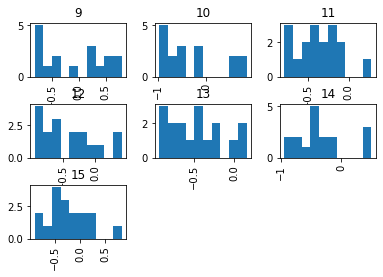

In [128]:
corr_pd.reset_index()['corr'].hist(by=corr_pd.reset_index()['hour_est'])

In [89]:
corr_dict

{'2022-06-01': -0.6473019690299326,
 '2022-06-02': -0.604592930651126,
 '2022-06-03': -0.23470387886841323,
 '2022-06-06': 0.20870695927294627,
 '2022-06-07': 0.20249288678642405,
 '2022-06-08': 0.4652104952302724,
 '2022-07-13': 0.35703995585139126,
 '2022-07-14': -0.7167909286038474,
 '2022-07-15': 0.45850281117572317,
 '2022-07-18': -0.1230383000284982,
 '2022-07-19': 0.11634296971763468,
 '2022-07-20': 0.2672660173041549,
 '2022-08-22': -0.6228531357282047,
 '2022-08-23': 0.4526555831587943,
 '2022-08-24': 0.15416005571642247,
 '2022-08-25': 0.1683543923579494,
 '2022-08-26': -0.4516946249560945}

In [175]:
ord_imb_file=f"s3://maystreetdata/analysis/spy_ord_imbalance_sample.parquet"
df = pq.read_table(source=ord_imb_file).to_pandas()#.set_index(['date_est','timestamp_ts_est']).sort_index().fillna(method='ffill')
#for one_col in ['trade_volume_signed_directional_sum','traded_price_mean']:
#    df[one_col]=df[one_col].astype(float)
#df.to_csv(ord_imb_file.replace('.parquet','.csv'))
df.groupby(['Product','AuctionTimestamp','AuctionType','dt']).max()['']

,Feed,SequenceNumber,ProductSequenceNumber,TotalImbalance,MarketImbalance,FarPrice,NearPrice,ReferencePrice,ClearingPrice,ClosingOnlyClearingPrice,...,AskQuantity,AuctionStatus,FreezeStatus,AuctionTimestamp,RoutableQuantity,MustFillQuantity,Counter,f,dt,Product
0,XDPV2,3476,3.0,100.0000000000000000000,0,0E-19,0E-19,412.9300000000000000000,0E-19,0E-19,...,NaN,WillRunForOpenClose,ImbalanceFreezeNotInEffect,1.654070e+18,None,None,76858,xdp_arca_integrated,2022-06-01,SPY
1,XDPV2,4116,4.0,50.0000000000000000000,0,0E-19,0E-19,412.9300000000000000000,0E-19,0E-19,...,NaN,WillRunForOpenClose,ImbalanceFreezeNotInEffect,1.654070e+18,None,None,86991,xdp_arca_integrated,2022-06-01,SPY
2,XDPV2,4117,5.0,15.0000000000000000000,0,0E-19,0E-19,412.9300000000000000000,0E-19,0E-19,...,NaN,WillRunForOpenClose,ImbalanceFreezeNotInEffect,1.654070e+18,None,None,87001,xdp_arca_integrated,2022-06-01,SPY
3,XDPV2,4156,6.0,14.0000000000000000000,0,0E-19,0E-19,412.9300000000000000000,0E-19,0E-19,...,NaN,WillRunForOpenClose,ImbalanceFreezeNotInEffect,1.654070e+18,None,None,87776,xdp_arca_integrated,2022-06-01,SPY
4,XDPV2,4162,7.0,12.0000000000000000000,0,0E-19,0E-19,412.9300000000000000000,0E-19,0E-19,...,NaN,WillRunForOpenClose,ImbalanceFreezeNotInEffect,1.654070e+18,None,None,87858,xdp_arca_integrated,2022-06-01,SPY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142751,XDPV2,69446818,12763978.0,10174.0000000000000000000,0,405.4700000000000000000,0E-19,409.5700000000000000000,0E-19,405.4700000000000000000,...,NaN,WillRunForOpenClose,ImbalanceFreezeInEffect,1.654114e+18,None,None,1287252702,xdp_arca_integrated,2022-06-01,SPY
142752,XDPV2,69455172,12766037.0,46570.0000000000000000000,0,405.5300000000000000000,0E-19,409.6300000000000000000,0E-19,405.5300000000000000000,...,NaN,WillRunForOpenClose,ImbalanceFreezeInEffect,1.654114e+18,None,None,1287397348,xdp_arca_integrated,2022-06-01,SPY
142753,XDPV2,69461980,12767721.0,12731.0000000000000000000,0,405.5900000000000000000,0E-19,409.6900000000000000000,0E-19,405.5900000000000000000,...,NaN,WillRunForOpenClose,ImbalanceFreezeInEffect,1.654114e+18,None,None,1287528045,xdp_arca_integrated,2022-06-01,SPY
142754,XDPV2,69469445,12769248.0,41903.0000000000000000000,0,405.5300000000000000000,0E-19,409.6300000000000000000,0E-19,405.5300000000000000000,...,NaN,WillRunForOpenClose,ImbalanceFreezeInEffect,1.654114e+18,None,None,1287674924,xdp_arca_integrated,2022-06-01,SPY


In [177]:
ord_imb_sample_file =f"s3://maystreetdata/analysis/spy_ord_imbalance_sample_last.parquet"
ord_imb_pd = pq.read_table(source=ord_imb_sample_file).to_pandas().dropna()
for one_col in ['TotalImbalance_signed','TotalImbalance_signed_pct']:
    ord_imb_pd[one_col]=ord_imb_pd[one_col].astype(float)

In [178]:
imbalance_stats  = pd.pivot_table(ord_imb_pd, values=['TotalImbalance_signed','TotalImbalance_signed_pct'],
                       index=['dt'],
                    columns=['AuctionType'], aggfunc=np.mean)
imbalance_stats

TotalImbalance_signed                         \
AuctionType               Closing EarlyOpening   Opening   
dt                                                         
2022-06-01                15273.0         18.0    4389.0   
2022-06-02                -5606.0         11.0   -4928.0   
2022-06-03                 1104.0       6026.0   -7092.0   
2022-06-06               -11786.0       -199.0    4009.0   
2022-06-07                -2643.0        -19.0   -1011.0   
2022-06-08                15095.0         -5.0    5961.0   
2022-07-13                12702.0        -57.0  136248.0   
2022-07-14                53060.0       -485.0    -304.0   
2022-07-15                -4608.0       -292.0     589.0   
2022-07-18                16503.0         23.0   -4744.0   
2022-07-19                -2796.0       -497.0   -9634.0   
2022-07-20                11748.0         11.0    -307.0   
2022-08-22                 3758.0        -14.0    5083.0   
2022-08-23                 4999.0         11.0    -510.0   
2022-08-24                -7467.0        -16.0   -1310.0   
2022-08-25               -21628.0        425.0  -21208.0   
2022-08-26                13068.0         76.0    1868.0   

            TotalImbalance_signed_pct                         
AuctionType                   Closing EarlyOpening   Opening  
dt                                                            
2022-06-01                   0.012301     0.211765  0.025597  
2022-06-02                  -0.002937     0.007280 -0.027826  
2022-06-03                   0.000663     1.502743 -0.038558  
2022-06-06                  -0.016249    -0.453303  0.023825  
2022-06-07                  -0.002415    -0.678571 -0.004779  
2022-06-08                   0.013962    -0.277778  0.028956  
2022-07-13                   0.011601    -5.700000  1.022123  
2022-07-14                   0.049814   -30.312500 -0.001306  
2022-07-15                  -0.003115   -26.545455  0.002756  
2022-07-18                   0.014055     0.095436 -0.025866  
2022-07-19                  -0.001642   -55.222222 -0.038104  
2022-07-20                   0.008859     0.611111 -0.001666  
2022-08-22                   0.002429    -0.168675  0.022573  
2022-08-23                   0.008628     0.152778 -0.005131  
2022-08-24                  -0.005973    -0.400000 -0.012787  
2022-08-25                  -0.010971     0.838264 -0.177030  
2022-08-26                   0.004806     1.551020  0.015474

In [179]:

sym='SPY'
timeframe='ytd'
spy_ohlc = pyEX_cl.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open','high','low']]

In [180]:
spy_ohlc

,close,open,high,low
date,,,,
2022-11-22,399.90,396.63,400.07,395.1527
2022-11-21,394.59,394.64,395.82,392.6600
2022-11-18,396.03,397.74,397.81,393.0400
2022-11-17,394.24,390.46,394.95,390.1400
2022-11-16,395.45,396.78,397.78,394.7900
...,...,...,...,...
2022-01-07,466.09,467.95,469.20,464.6500
2022-01-06,467.94,467.89,470.82,465.4300
2022-01-05,468.38,477.16,477.98,468.2800


In [181]:
imb_price_pd = imbalance_stats.join(spy_ohlc)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [182]:
imb_price_pd.to_csv('s3://maystreetdata/analysis/imb_price.csv')

In [21]:
of_sample= 's3://maystreetdata/analysis/spy_odd_lot_sample_OF_SAMPLE.parquet'
ord_imb_file=f"s3://maystreetdata/analysis/spy_ord_imbalance_sample.parquet"
of_sample_pd = pq.read_table(source=of_sample).to_pandas()#.set_index(['date_est','timestamp_ts_est']).sort_index().fillna(method='ffill')
of_sample_pd.to_csv('s3://maystreetdata/analysis/spy_odd_lot_sample_OF_SAMPLE.csv')

In [13]:
of_sample_pd['MidPrice']=((of_sample_pd['BidPrice_1']+of_sample_pd['AskPrice_1'])/2).astype(float)

In [6]:
#BidQuantity_1_change
col_range=[i+1 for i in range(10)]
weight_cols =[]
bid_change_w_cols=[]
ask_change_w_cols=[]
for one_col in col_range:
    weight_c =f"{one_col}_weight"
    weight_cols=weight_cols+[weight_c]
    bid_col = f"BidQuantity_{one_col}_change"
    ask_col = f"AskQuantity_{one_col}_change"
    bid_change_w_cols=bid_change_w_cols+[f"{bid_col}_weight"]
    ask_change_w_cols=ask_change_w_cols+[f"{ask_col}_weight"]
    
    of_sample_pd[weight_c]=math.sqrt(1/one_col)
    of_sample_pd[f"{bid_col}_weight"]=of_sample_pd[weight_c]*of_sample_pd[f"{bid_col}"]
    of_sample_pd[f"{ask_col}_weight"]=of_sample_pd[weight_c]*of_sample_pd[f"{ask_col}"]*-1
of_sample_pd['sum_of_weights']=of_sample_pd[weight_cols].sum(axis=1)
of_sample_pd['sum_of_bid_w']=of_sample_pd[bid_change_w_cols].sum(axis=1)
of_sample_pd['sum_of_ask_w']=of_sample_pd[ask_change_w_cols].sum(axis=1)


In [19]:
of_sample_pd_by_second = of_sample_pd.groupby(['date_est','time_est']).agg({'sum_of_weights':'sum','sum_of_bid_w':'sum','sum_of_ask_w':'sum','MidPrice':['median','min','max']})
of_sample_pd_by_second['bid_ask_imb']=(of_sample_pd_by_second['sum_of_ask_w']+of_sample_pd_by_second['sum_of_bid_w'])/(of_sample_pd_by_second['sum_of_ask_w'].abs()+of_sample_pd_by_second['sum_of_bid_w'].abs())
of_sample_pd_by_second

sum_of_weights sum_of_bid_w sum_of_ask_w MidPrice  \
                               sum          sum          sum   median   
date_est   time_est                                                     
2022-06-01 09:45:01   39480.106482   205.319957 -4027.860743  415.050   
           09:45:02   39429.896503  1402.441605 -5184.151368  415.045   
           09:45:03   11513.148183   395.636688   834.428502  414.910   
           09:45:04    6110.554443 -2504.377809  1509.387234  414.930   
           09:45:05   14540.809916  -952.646021   -12.003127  414.885   
           09:45:06   18231.243372  5503.953728  2243.689579  414.845   
           09:45:07   32591.297364  -305.817125 -1542.823857  414.700   
           09:45:08   21012.876209 -2516.176370  1022.057460  414.620   
           09:45:09   24643.057690  2093.588932 -1247.717794  414.630   
           09:45:10   18401.957301  1364.505864  -732.208619  414.625   
           09:45:11   15454.631534  -961.766167  1074.632144  414.615   
           09:45:12   13456.274370   -50.412660  1472.307511  414.615   
           09:45:13   22328.377658  -879.342177  1802.974523  414.620   
           09:45:14   20224.579538 -1290.042385  4028.950327  414.615   

                                      bid_ask_imb  
                         min      max              
date_est   time_est                                
2022-06-01 09:45:01  414.830  415.280   -0.902995  
           09:45:02  414.805  415.200   -0.574153  
           09:45:03  414.810  415.035    1.000000  
           09:45:04  414.890  414.990   -0.247895  
           09:45:05  414.800  414.985   -1.000000  
           09:45:06  414.780  415.040    1.000000  
           09:45:07  408.855  415.245   -1.000000  
           09:45:08  414.235  414.735   -0.422278  
           09:45:09  414.540  414.735    0.253156  
           09:45:10  414.565  414.735    0.301566  
           09:45:11  414.560  414.820    0.055424  
           09:45:12  414.570  414.680    0.933786  
           09:45:13  414.520  414.910    0.344341  
           09:45:14  405.245  414.725    0.514930

In [3]:
of_sample= 's3://maystreetdata/analysis/spy_odd_lot_sample_OF_by_second.parquet'
of_sample_pd_by_second = pq.read_table(source=of_sample).to_pandas().set_index(['dt','time_est']).sort_index().dropna().drop(columns=['Product']).astype(float)#.astype(float)
#of_sample_pd.to_csv('s3://maystreetdata/analysis/spy_odd_lot_sample_OF_by_second.csv')
of_sample_pd_by_second

is_trading_hours  MidPrice_open  MidPrice_high  \
dt         time_est                                                   
2022-06-01 04:00:06               0.0        413.825        415.995   
           04:00:09               0.0        413.830        413.830   
           04:00:14               0.0        413.825        415.980   
           04:00:17               0.0        413.835        415.995   
           04:00:18               0.0        413.845        416.010   
...                               ...            ...            ...   
2022-08-26 19:55:25               0.0        404.065        404.065   
           19:56:29               0.0        403.995        403.995   
           19:56:43               0.0        403.960        403.965   
           19:56:53               0.0        403.925        403.960   
           19:57:22               0.0        403.935        403.935   

                     MidPrice_low  MidPrice_close  bid_ask_imb_mean  \
dt         time_est                                                   
2022-06-01 04:00:06       413.825         413.845          0.046444   
           04:00:09       413.830         413.830          1.000000   
           04:00:14       413.820         413.820          0.236966   
           04:00:17       413.835         413.850          0.303720   
           04:00:18       413.845         413.860          0.327124   
...                           ...             ...               ...   
2022-08-26 19:55:25       404.065         404.065         -1.000000   
           19:56:29       403.800         403.800          1.000000   
           19:56:43       403.800         403.965          0.050704   
           19:56:53       403.925         403.960         -1.000000   
           19:57:22       403.935         403.935         -1.000000   

                     bid_ask_imb_sum  close_to_open  close_to_close_1  \
dt         time_est                                                     
2022-06-01 04:00:06         0.696660       0.000012         -0.000048   
           04:00:09         1.000000      -0.000012         -0.000012   
           04:00:14         1.421797       0.005220          0.000036   
           04:00:17         3.340915      -0.000012          0.000024   
           04:00:18         3.598361       0.000048          0.000048   
...                              ...            ...               ...   
2022-08-26 19:55:25        -1.000000      -0.000049         -0.000074   
           19:56:29         1.000000       0.000483          0.000409   
           19:56:43         0.101408      -0.000012         -0.000012   
           19:56:53        -1.000000      -0.000062         -0.000062   
           19:57:22        -1.000000      -0.000025         -0.000025   

                     close_to_close_2  ...  close_to_close_10_directional  \
dt         time_est                    ...                                  
2022-06-01 04:00:06         -0.000048  ...                       0.000012   
           04:00:09         -0.000012  ...                       0.000133   
           04:00:14          0.000072  ...                       0.000254   
           04:00:17          0.000072  ...                       0.000169   
           04:00:18          0.000060  ...                       0.000157   
...                               ...  ...                            ...   
2022-08-26 19:55:25         -0.000074  ...                       0.000099   
           19:56:29          0.000409  ...                       0.000334   
           19:56:43         -0.000012  ...                      -0.000087   
           19:56:53         -0.000062  ...                       0.000062   
           19:57:22         -0.000025  ...                       0.000025   

                     close_to_close_15_check_imb_mean  \
dt         time_est                                     
2022-06-01 04:00:06                               1.0   
           04:00:09                               

In [12]:
of_sample_pd_by_second[['bid_ask_imb_mean']].quantile([0.1,0.25,0.4,0.6,0.75,0.9,0.95])

,bid_ask_imb_mean
0.10,-0.058574
0.25,-0.012685
0.40,-0.004231
0.60,0.003800
0.75,0.012043
0.90,0.054029
0.95,0.147585


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc28064a58>]],
      dtype=object)

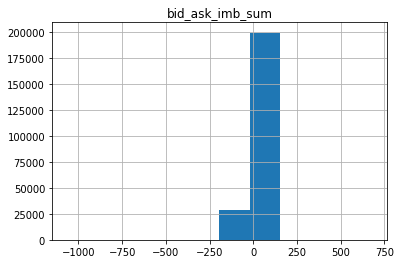

In [5]:
of_sample_pd_by_second[['bid_ask_imb_sum']].hist()